In [1]:
import pandas as pd

# Prepare the Data

In [2]:
# Import the data
startup_path = "https://static.bc-edx.com/ai/ail-v-1-0/m13/lesson_1/datasets/start-up-success.csv"
df = pd.read_csv(startup_path)
df.head()

,Financial Performance,Industry Health,Firm Category
0,-2.761650,-2.414516,0
1,2.867162,1.989524,1
2,-0.701230,-1.074845,0
3,-3.516214,-1.928217,0
4,-0.981901,-2.798853,0


In [3]:
df['Firm Category'].value_counts()

Firm Category
0    978
1    346
Name: count, dtype: int64

<Axes: xlabel='Financial Performance', ylabel='Industry Health'>

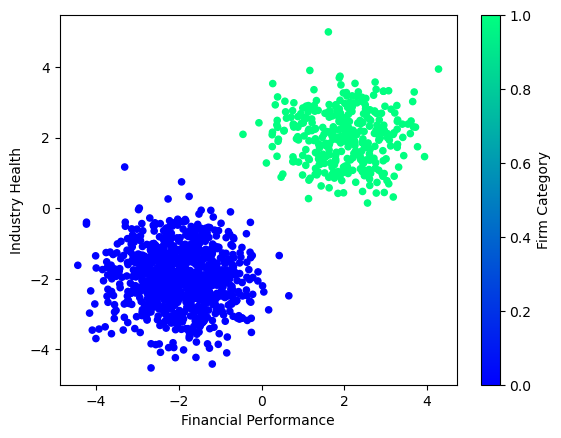

In [8]:
# Plot the data on a scatter plot
df.plot(kind='scatter', x='Financial Performance', y='Industry Health', 
        c='Firm Category', colormap='winter')

In [9]:
# Preview the DataFrame
df.head()

,Financial Performance,Industry Health,Firm Category
0,-2.761650,-2.414516,0
1,2.867162,1.989524,1
2,-0.701230,-1.074845,0
3,-3.516214,-1.928217,0
4,-0.981901,-2.798853,0


In [10]:
# Check the number of unhealthy vs. healthy firms ('Firm Category')
# using value_counts
df['Firm Category'].value_counts()

Firm Category
0    978
1    346
Name: count, dtype: int64

# Split the data into training and testing sets

In [11]:
# Import Module
from sklearn.model_selection import train_test_split

# Split training and testing sets
# Create the features DataFrame, X
X = df.copy()
X = X.drop(columns='Firm Category')

# Create the target DataFrame, y
y = df['Firm Category']

# Use train_test_split to separate the data
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [12]:
df.shape

(1324, 3)

In [13]:
# Review the X_train DataFrame
X_train

,Financial Performance,Industry Health
312,-1.689812,-2.283839
28,1.619796,1.754692
236,-2.265027,-1.690769
220,-2.597727,-0.646036
524,2.156597,1.873222
...,...,...
1102,-1.376407,-2.869041
294,2.490127,1.069903
168,-1.719106,-2.055016
75,-2.455319,-2.849437


# Model and Fit the Data to a Logistic Regression

In [16]:
# Import `LogisticRegression` from sklearn
from sklearn.linear_model import LogisticRegression


In [17]:
# Create a `LogisticRegression` function and assign it 
# to a variable named `logistic_regression_model`.
lr_model = LogisticRegression()

In [18]:
# Fit the model
lr_model.fit(X_train, y_train)

LogisticRegression()

In [19]:
# Score the model
print(f"Training Data Score: {lr_model.score(X_train, y_train)}")
print(f"Testing  Data Score: {lr_model.score(X_test, y_test)}")

Training Data Score: 1.0
Testing  Data Score: 1.0


# Predict the Testing Labels

In [21]:
# Generate predictions from the model we just fit
predictions = lr_model.predict(X_train)

# Convert those predictions (and actual values) to a DataFrame
results_df = pd.DataFrame({'Predictions': predictions, "Actual" : y_train})

results_df

,Predictions,Actual
312,0,0
28,1,1
236,0,0
220,0,0
524,1,1
...,...,...
1102,0,0
294,1,1
168,0,0
75,0,0


In [22]:
# Apply the fitted model to the `test` dataset
test_predictions = lr_model.predict(X_test)

# Save both the test predictions and actual test values to a DataFrame
results_df = pd.DataFrame({'Test Predictions': test_predictions, "Actual Testing" : y_test})

results_df

,Test Predictions,Actual Testing
141,1,1
988,1,1
888,0,0
949,0,0
829,0,0
...,...,...
704,1,1
863,0,0
683,0,0
1109,0,0


In [24]:
# Import the accuracy_score function
from sklearn.metrics import accuracy_score

# Calculate the model's accuracy on the test dataset
accuracy_score(y_test, test_predictions)

1.0

In [28]:
330/331

0.9969788519637462